In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# Load results
df = pd.read_csv("scan_results.csv")

In [2]:
df["gc_gv"] = df["gc"] / df["gv"]
df["T1_gc"] = df["T1"] * df["gc"]
df["T2_gc"] = df["T2"] * df["gc"]
df["T_ratio"] = df["T1"] / df["T2"]

In [3]:
corr = df[["gc", "gv", "gc_gv", "T1_gc", "T2_gc", "T_ratio", "Fidelity", "Concurrence"]].corr()
print(corr["Fidelity"])
print(corr["Concurrence"])

gc             0.033662
gv            -0.289547
gc_gv          0.193135
T1_gc          0.078696
T2_gc          0.032190
T_ratio        0.050523
Fidelity       1.000000
Concurrence    0.910004
Name: Fidelity, dtype: float64
gc            -0.223342
gv            -0.285662
gc_gv          0.179523
T1_gc         -0.154385
T2_gc         -0.215740
T_ratio        0.100404
Fidelity       0.910004
Concurrence    1.000000
Name: Concurrence, dtype: float64


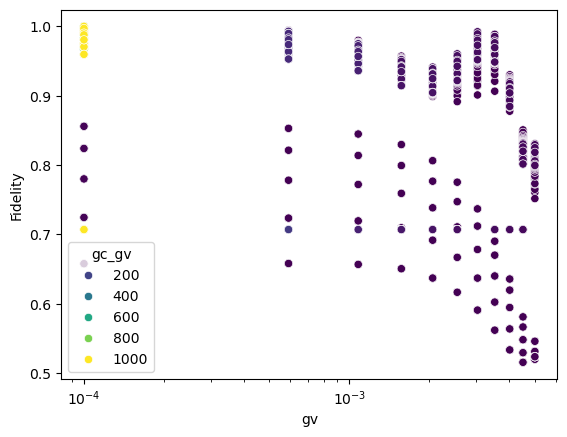

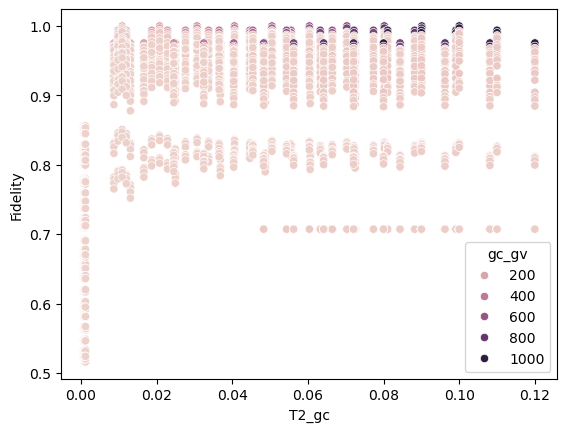

In [5]:


sns.scatterplot(x="gv", y="Fidelity", data=df, hue="gc_gv", palette="viridis")
plt.xscale("log")   # sometimes helps
plt.show()

sns.scatterplot(x="T2_gc", y="Fidelity", data=df, hue="gc_gv")
plt.show()

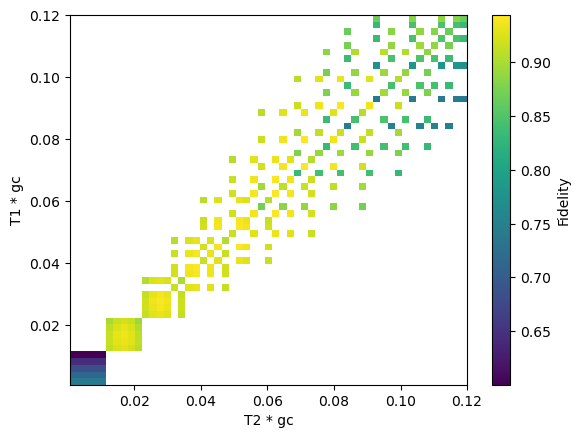

In [6]:
pivot = df.pivot_table(index="T1_gc", columns="T2_gc", values="Fidelity", aggfunc="mean")
plt.imshow(pivot.values,
           extent=[pivot.columns.min(), pivot.columns.max(),
                   pivot.index.min(), pivot.index.max()],
           origin="lower", aspect="auto", cmap="viridis")
plt.xlabel("T2 * gc")
plt.ylabel("T1 * gc")
plt.colorbar(label="Fidelity")
plt.show()

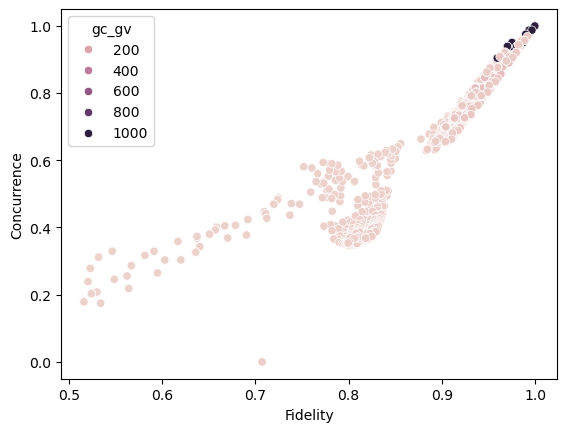

In [7]:
sns.scatterplot(x="Fidelity", y="Concurrence", data=df, hue="gc_gv")
plt.show()